Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

Load Dataset

In [ ]:
df = pd.read_csv('portfolio_data.csv')

In [ ]:
#first 10 rows in the dataset
df.head()

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285


In [ ]:
#convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.head()

,Date,AMZN,DPZ,BTC,NFLX
0,2013-05-01,248.229996,51.190983,106.250000,30.415714
1,2013-05-02,252.550003,51.987320,98.099998,30.641428
2,2013-05-03,258.049988,52.446388,112.900002,30.492857
3,2013-05-06,255.720001,53.205257,109.599998,30.098572
4,2013-05-07,257.730011,54.151505,113.199997,29.464285


In [ ]:
# Setting the Date column as the index
df.set_index('Date', inplace=True)

Exploratory Data Analysis (EDA)

In [ ]:
df.head()

,AMZN,DPZ,BTC,NFLX
Date,,,,
2013-05-01,248.229996,51.190983,106.250000,30.415714
2013-05-02,252.550003,51.987320,98.099998,30.641428
2013-05-03,258.049988,52.446388,112.900002,30.492857
2013-05-06,255.720001,53.205257,109.599998,30.098572
2013-05-07,257.730011,54.151505,113.199997,29.464285


In [ ]:
df.tail()

,AMZN,DPZ,BTC,NFLX
Date,,,,
2019-05-08,1917.770020,283.149994,6171.959961,364.369995
2019-05-09,1899.869995,282.160004,6358.290039,362.750000
2019-05-10,1889.979980,278.369995,7191.359863,361.040009
2019-05-13,1822.680054,273.880005,7980.129883,345.260010
2019-05-14,1840.119995,272.859985,8183.830078,345.609985


In [ ]:
#no.of rows and columns
df.shape

(1520, 4)

In [ ]:
#columns
df.columns

Index(['AMZN', 'DPZ', 'BTC', 'NFLX'], dtype='object')

In [ ]:
# Checking for null values
df.isnull().sum()

AMZN    0
DPZ     0
BTC     0
NFLX    0
dtype: int64

In [ ]:
#Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1520 entries, 2013-05-01 to 2019-05-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    1520 non-null   float64
 1   DPZ     1520 non-null   float64
 2   BTC     1520 non-null   float64
 3   NFLX    1520 non-null   float64
dtypes: float64(4)
memory usage: 59.4 KB


In [ ]:
#statistical info
df.describe()

,AMZN,DPZ,BTC,NFLX
count,1520.000000,1520.000000,1520.000000,1520.000000
mean,821.541810,146.771695,2421.465669,147.668273
std,518.442653,72.192287,3310.894199,107.641486
min,248.229996,51.190983,69.660004,29.464285
25%,364.360001,84.993593,340.904999,62.851071
50%,686.459992,127.168053,625.304993,104.000000
75%,1121.287536,202.454994,3874.912415,192.207496
max,2039.510010,298.635986,18972.320310,418.970001


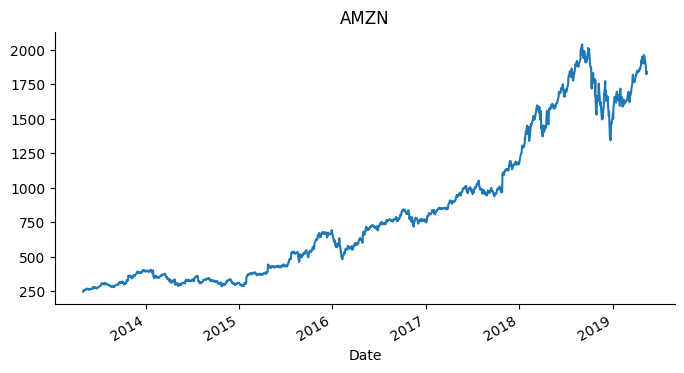

In [ ]:
df['AMZN'].plot(kind='line', figsize=(8, 4), title='AMZN')
plt.gca().spines[['top', 'right']].set_visible(False)

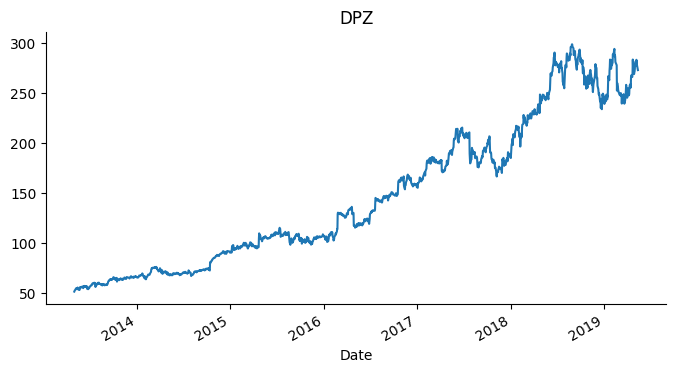

In [ ]:
df['DPZ'].plot(kind='line', figsize=(8, 4), title='DPZ')
plt.gca().spines[['top', 'right']].set_visible(False)

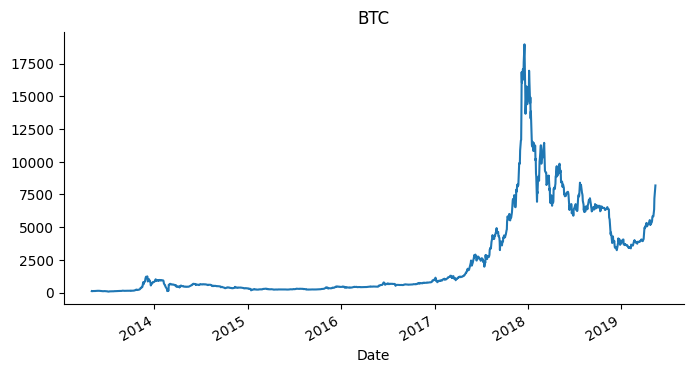

In [ ]:
df['BTC'].plot(kind='line', figsize=(8, 4), title='BTC')
plt.gca().spines[['top', 'right']].set_visible(False)

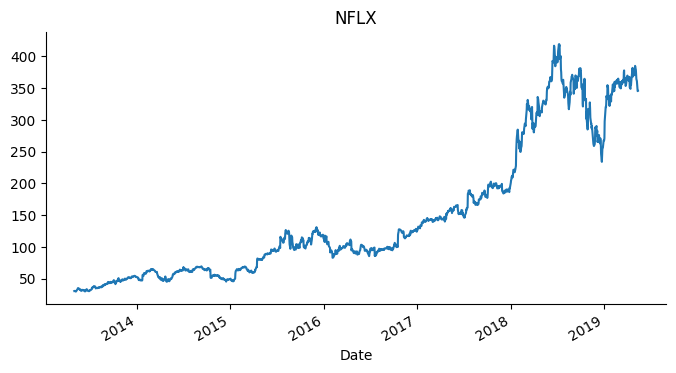

In [ ]:
df['NFLX'].plot(kind='line', figsize=(8, 4), title='NFLX')
plt.gca().spines[['top', 'right']].set_visible(False)

 Time Series Decomposition: Decomposiing the time series to observe trend, seasonality, and residuals

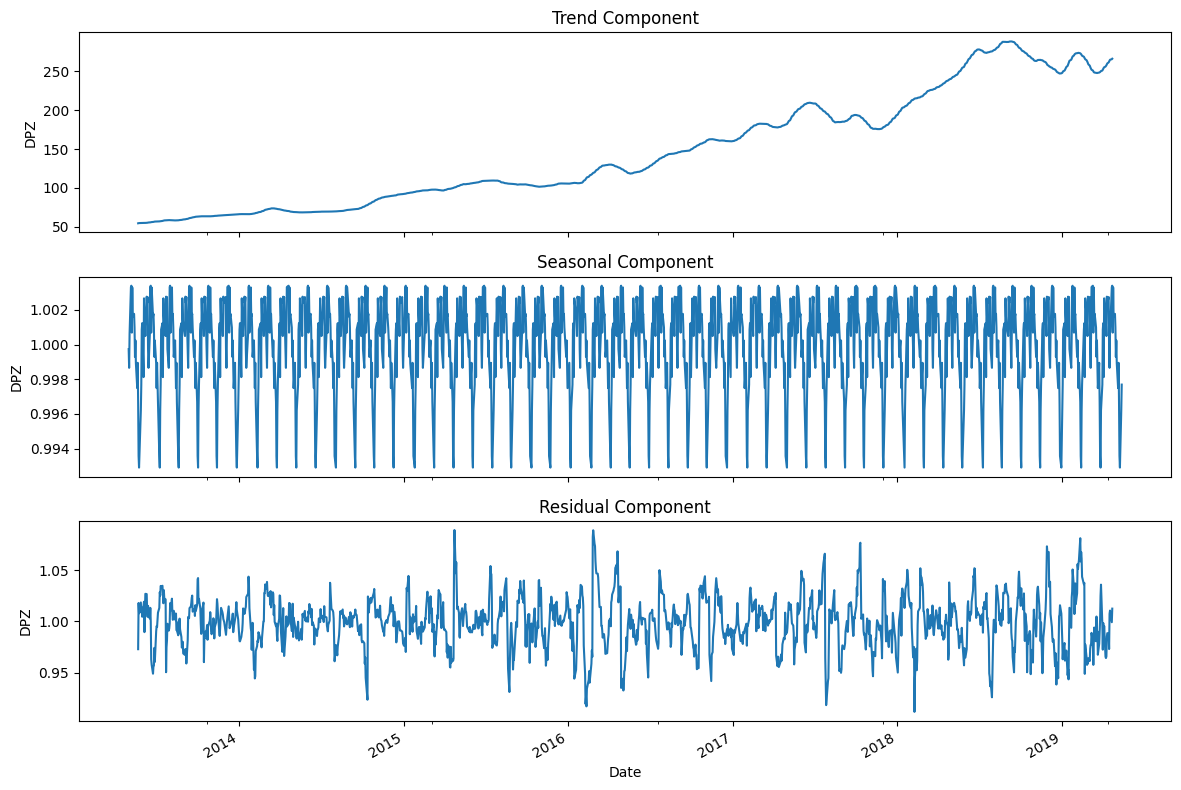

In [ ]:
result = seasonal_decompose(df['DPZ'], period=30, model='multiplicative')
fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Plot for trend component
result.trend.plot(ax=axs[0], label='Trend')
axs[0].set_ylabel('DPZ')
axs[0].set_title('Trend Component')

# Plot for seasonal component
result.seasonal.plot(ax=axs[1], label='Seasonality')
axs[1].set_ylabel('DPZ')
axs[1].set_title('Seasonal Component')

# Plot for residual component
result.resid.plot(ax=axs[2], label='Residuals')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('DPZ')
axs[2].set_title('Residual Component')

plt.tight_layout()
plt.show()

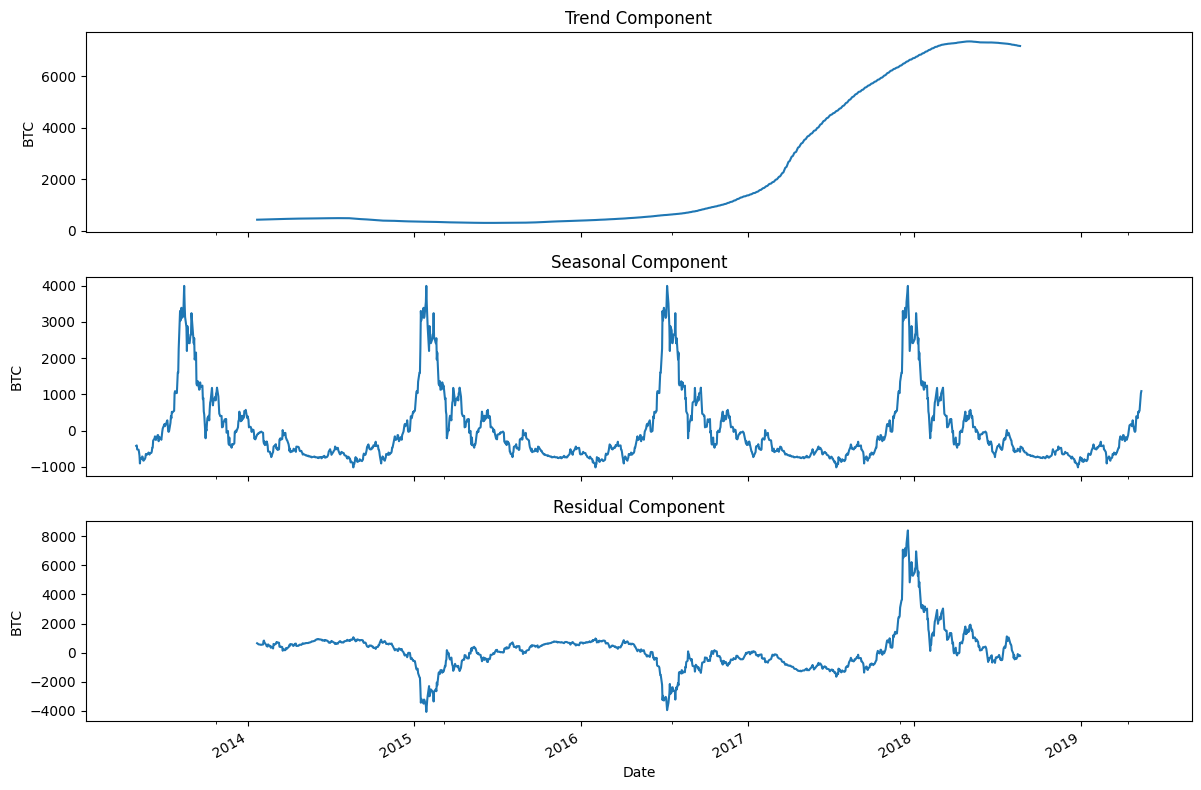

In [ ]:
result = seasonal_decompose(df['BTC'], period=365, model='additive')
fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Plot for trend component
result.trend.plot(ax=axs[0], label='Trend')
axs[0].set_ylabel('BTC')
axs[0].set_title('Trend Component')

# Plot for seasonal component
result.seasonal.plot(ax=axs[1], label='Seasonality')
axs[1].set_ylabel('BTC')
axs[1].set_title('Seasonal Component')

# Plot for residual component
result.resid.plot(ax=axs[2], label='Residuals')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('BTC')
axs[2].set_title('Residual Component')

plt.tight_layout()
plt.show()

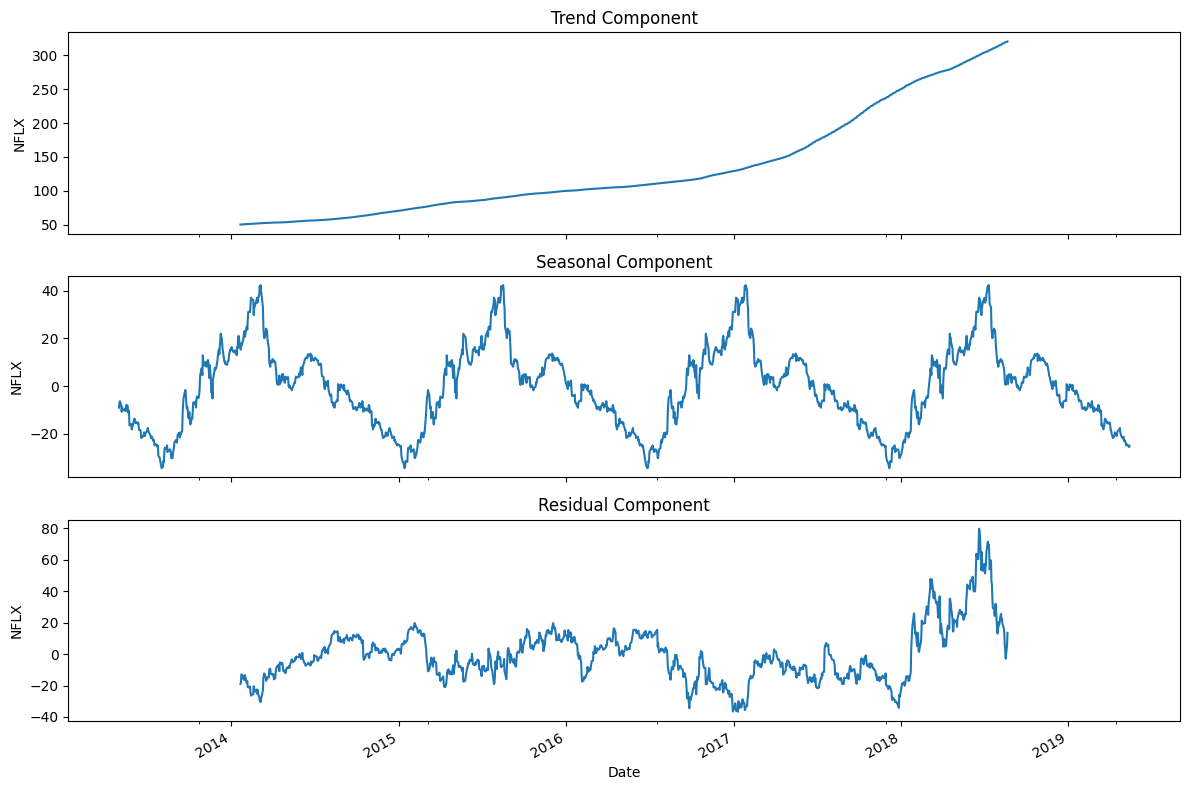

In [ ]:
result = seasonal_decompose(df['NFLX'], period=365, model='additive')
fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Plot for trend component
result.trend.plot(ax=axs[0], label='Trend')
axs[0].set_ylabel('NFLX')
axs[0].set_title('Trend Component')

# Plot for seasonal component
result.seasonal.plot(ax=axs[1], label='Seasonality')
axs[1].set_ylabel('NFLX')
axs[1].set_title('Seasonal Component')

# Plot for residual component
result.resid.plot(ax=axs[2], label='Residuals')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('NFLX')
axs[2].set_title('Residual Component')

plt.tight_layout()
plt.show()

In [ ]:
#Splitting the data into train and test sets
train_data = df[:'2016-06-13']
test_data = df['2016-06-14':]

In [ ]:
#fit the model
model = ARIMA(train_data['DPZ'], order=(5, 1, 0))
fitted_model = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


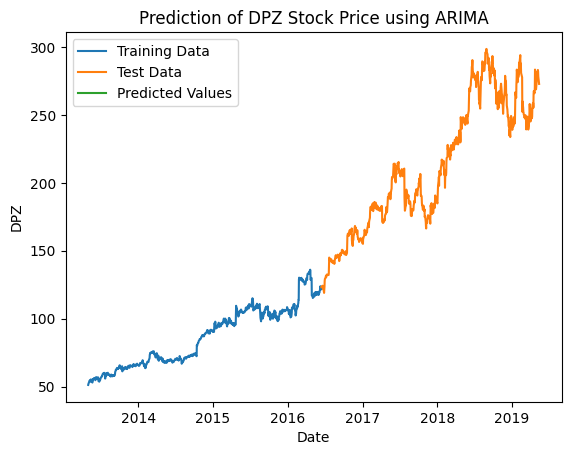

In [ ]:
# Forecast for the next 30 days
forecast = fitted_model.forecast(steps=30)

# Creating a new dataframe to store the predicted values
forecast_df = pd.DataFrame(forecast, index=pd.date_range(start='2016-06-14', periods=30, freq='D'), columns=['Predicted_DPZ'])

# Plot for forecasted values
plt.plot(train_data['DPZ'], label='Training Data')
plt.plot(test_data['DPZ'], label='Test Data')
plt.plot(forecast_df['Predicted_DPZ'], label='Predicted Values')
plt.xlabel('Date')
plt.ylabel('DPZ')
plt.title('Prediction of DPZ Stock Price using ARIMA')
plt.legend()
plt.show()
